# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls

In [26]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_count=1
set_count=1
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

print("Started")
print("-----------")

for c, city in enumerate(cities):
    if (c % 50 == 0 and c >= 50):
        set_count += 1 
        city_count = 1
    query_url = url +"&q=" + city
    response = requests.get(query_url).json()
    print(f"Processing Record {city_count} of Set {set_count} | {city}")
    city_count += 1
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
    except:
        print("City not found.")
        pass

print("-----------")
print("Completed")

Started
-----------
Processing Record 1 of Set 1 | vostok
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | coquimbo
Processing Record 6 of Set 1 | dingle
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | jiexiu
Processing Record 10 of Set 1 | okhotsk
Processing Record 11 of Set 1 | russell
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | yeppoon
Processing Record 15 of Set 1 | sao filipe
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | fairbanks
Processing Record 18 of Set 1 | sentyabrskiy
City not found.
Processing Record 19 of Set 1 | mahibadhoo
Processing Record 20 of Set 1 | lensk
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | vaitupu
City not found.
Processing Record 23 of Set 1 | jamestown
Processing Record

### Convert Raw Data to DataFrame

In [27]:
#Export the city data into a .csv.
#Display the DataFrame
#Create dictionary 
weather_data = {
     "City": city_name,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create data frame and count columns
weatherconvert_df=pd.DataFrame(weather_data)
weatherconvert_df.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

### Plotting the Data

In [40]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

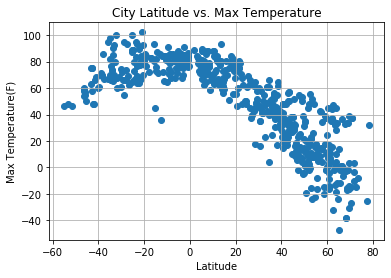

In [41]:
plt.scatter(x=weatherconvert_df["Lat"], y=weatherconvert_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.savefig("Fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

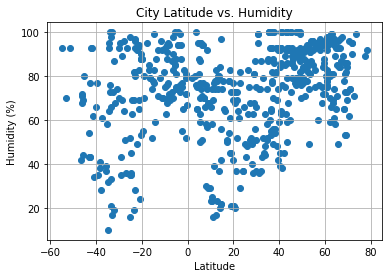

In [42]:
plt.scatter(x=weatherconvert_df["Lat"], y=weatherconvert_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.savefig("Fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

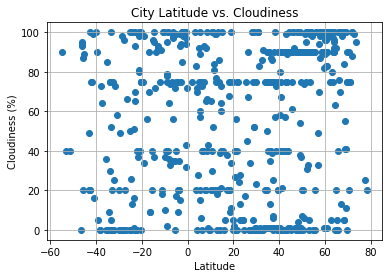

In [43]:
plt.scatter(x=weatherconvert_df["Lat"], y=weatherconvert_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.savefig("Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

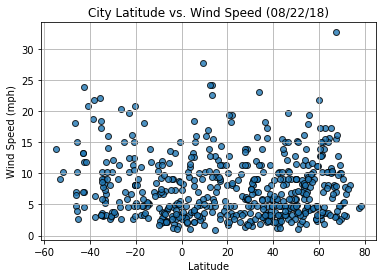

In [9]:
#